# CÂU 1. Clustering 

**Cho dữ liệu bbc (giải nén file bbc-fulltext). Đọc tất cả dữ liệu vào dataframe news theo định dạng.** 

**Yêu cầu : Chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc phân cụm dữ liệu dựa trên cột content của dataframe news trên.** 

1. Áp dụng thuật toán thích hợp. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp? 
2. Tìm kết quả => có bao nhiêu cụm => mẫu (tin tức) nào thuộc cụm nào?  
3. Nhận xét trên từng cụm: mỗi cụm có những keywords nào ? Vẽ WordClouds cho từng cụm. 
4. Kiểm chứng lại với **class** đã có 

## 1. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get all folders name
import os

folder = 'Data/bbc-fulltext/bbc/'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders)

['business', 'entertainment', 'politics', 'sport', 'tech']


In [3]:
# Create file paths
sub_folders_path=[]
for i in sub_folders:
    folder_new = folder + i
    sub_folders_path.append(folder_new)
sub_folders_path

['Data/bbc-fulltext/bbc/business',
 'Data/bbc-fulltext/bbc/entertainment',
 'Data/bbc-fulltext/bbc/politics',
 'Data/bbc-fulltext/bbc/sport',
 'Data/bbc-fulltext/bbc/tech']

In [4]:
import glob

list_data_file = []

for folder in sub_folders_path:
    txt_files = glob.glob(folder + '/*.txt')
    for file in txt_files:
        data = pd.read_table(file, header=None, encoding='latin1',engine='python', error_bad_lines=False)
        data['class'] = os.path.basename(folder)   # strip path to get folder name
        list_data_file.append(data)
    
all_data_df = pd.concat(list_data_file, ignore_index=True)
    
all_data_df.columns = ['content', 'class']
all_data_df.head(10)

Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 17: '	' expected 

Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expecte

Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"

Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 69: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expec

,content,class
0,Ad sales boost Time Warner profit,business
1,Quarterly profits at US media giant TimeWarner...,business
2,"The firm, which is now one of the biggest inve...",business
3,Time Warner said on Friday that it now owns 8%...,business
4,Time Warner's fourth quarter profits were slig...,business
5,TimeWarner is to restate its accounts as part ...,business
6,Dollar gains on Greenspan speech,business
7,The dollar has hit its highest level against t...,business
8,And Alan Greenspan highlighted the US governme...,business
9,Worries about the deficit concerns about China...,business


In [5]:
all_data_df.tail(10)

,content,class
12153,As many of the players spend their time in MMO...,tech
12154,These games are like most things -- too much o...,tech
12155,"Living in Korea at the moment, they have lots ...",tech
12156,I play xbox live every day. I find my self lyi...,tech
12157,Me and my mate play online for an hour or two ...,tech
12158,I bought the US version of World of Warcraft w...,tech
12159,Having played MMORPG games for some years I ag...,tech
12160,Unless there is undeniable medical proof that ...,tech
12161,These people are pathetic. They need to get of...,tech
12162,"24hours, when i was a kid at school and i was ...",tech


In [5]:
all_data_df.to_csv('bbc-fulltext.csv')

In [6]:
all_data_df.shape

(12163, 2)

In [7]:
all_data_df['class'].value_counts()

sport            2646
business         2579
politics         2536
tech             2402
entertainment    2000
Name: class, dtype: int64

In [8]:
all_data_df.isnull().sum()

content    0
class      0
dtype: int64

## 2. Chuẩn hóa dữ liệu

In [18]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

In [19]:
# liệt kê các từ cần xóa vì có thể ảnh hưởng đến độ chính xác của model
import nltk
nltk.download('stopwords', quiet=True)
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'a', "doesn't", 'now', 'wasn', 'they', 'as', "you've", 'off', 'too', 'who', "needn't", "mustn't", 'my', 'he', 'further', 'once', "don't", 'the', 'than', "she's", 'our', 'her', 'or', "you'd", 've', 'himself', 'some', 'll', 'each', "hasn't", 'about', 'if', 'not', 'it', 'what', 'own', 'did', 'ain', 'these', 'was', 'ours', 'y', 'during', 'couldn', 'whom', 'yourself', 'here', 'are', 'when', 'having', "you'll", "it's", 'am', 'isn', 'had', 'just', 'and', 'there', "you're", 'why', 'down', "isn't", 'other', 'needn', "shan't", 'into', 'where', 'mightn', 'above', 'nor', 'me', 't', 'yourselves', 'aren', 'shouldn', 'his', 'wouldn', 'again', 'don', 'be', "mightn't", 'in', "didn't", 'weren', "won't", 'because', 'shan', 'herself', 'should', "that'll", 'haven', 'i', 'been', 'won', 'myself', 'its', 'your', 'have', 'for', 'o', 'of', 'being', 'very', 'do', "haven't", 'm', "wouldn't", 'didn', 'below', 'how', 'over', 'any', 'you', "should've", 'both', "couldn't", 'through', 'doesn', 'out', 'until', 'him', 

In [20]:
content_sw = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [21]:
ps = PorterStemmer()

In [63]:
content_ps = content_sw.apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(content_ps)

0                         ad sale boost time warner profit
1        quarterli profit us media giant timewarn jump ...
2        the firm, one biggest investor google, benefit...
3        time warner said friday own 8% search-engin go...
4        time warner' fourth quarter profit slightli be...
                               ...                        
12158    i bought us version world warcraft came out. t...
12159    have play mmorpg game year i agre type game li...
12160    unless undeni medic proof stare comput screen ...
12161    these peopl pathetic. they need get machin not...
12162    24hours, kid school half term, ultima onlin ga...
Name: content, Length: 12163, dtype: object


In [23]:
# Xóa các ký tự đặc biệt và chuyển về ký tự thường
all_data_df['content_clean'] = content_ps.str.replace('[^a-zA-Z]', ' ').str.lower()
all_data_df.loc[0, 'content_clean'][:100]

'ad sale boost time warner profit'

In [24]:
all_data_df = all_data_df[['content','content_clean','class']]

In [25]:
# Chuẩn hóa dữ liệu text
# Import thư viện
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo Tf-Idf
tf = TfidfVectorizer(stop_words='english', max_features=1000)

df_temp = tf.fit_transform(all_data_df['content_clean']).toarray()

df_temp = pd.DataFrame(df_temp, columns=tf.get_feature_names()).add_prefix('TFIDF_')
df_temp.head()

,TFIDF_abl,TFIDF_accept,TFIDF_access,TFIDF_accord,TFIDF_account,TFIDF_accus,TFIDF_achiev,TFIDF_act,TFIDF_action,TFIDF_activ,...,TFIDF_worth,TFIDF_write,TFIDF_written,TFIDF_wrong,TFIDF_year,TFIDF_years,TFIDF_york,TFIDF_young,TFIDF_yuko,TFIDF_zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.194259,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.225423,0.0,0.0,0.0,0.0,0.0


In [26]:
df = pd.concat([all_data_df,df_temp], axis=1)
df.head()

,content,content_clean,class,TFIDF_abl,TFIDF_accept,TFIDF_access,TFIDF_accord,TFIDF_account,TFIDF_accus,TFIDF_achiev,...,TFIDF_worth,TFIDF_write,TFIDF_written,TFIDF_wrong,TFIDF_year,TFIDF_years,TFIDF_york,TFIDF_young,TFIDF_yuko,TFIDF_zealand
0,Ad sales boost Time Warner profit,ad sale boost time warner profit,business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Quarterly profits at US media giant TimeWarner...,quarterli profit us media giant timewarn jump ...,business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.194259,0.0,0.0,0.0,0.0,0.0
2,"The firm, which is now one of the biggest inve...",the firm one biggest investor google benefit...,business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Time Warner said on Friday that it now owns 8%...,time warner said friday own search engin go...,business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Time Warner's fourth quarter profits were slig...,time warner fourth quarter profit slightli be...,business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.225423,0.0,0.0,0.0,0.0,0.0


## 3. Áp dụng thuật toán

### 3.1. K-Means Cluster

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

0.011385488667271949
0.012331413275514026
0.012874453408282862
0.011069943866820598
0.011699513485527982
0.011852762700911151
0.013500731981391317
0.013148770205971366


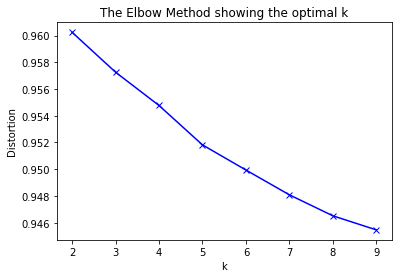

In [28]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.iloc[:,3:])
    print(silhouette_score(df.iloc[:,3:], kmeanModel.labels_))
    distortions.append(sum(np.min(cdist(df.iloc[:,3:], kmeanModel.cluster_centers_,'euclidean'), axis=1))/df.iloc[:,3:].shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [38]:
# Select k=8
k=8
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.iloc[:,3:])

centrolds = kmeans.cluster_centers_
labels = kmeans.labels_

print(centrolds)
print(labels)

[[ 4.36520419e-03  1.32116386e-03  7.01481616e-04 ...  3.73729539e-03
  -4.98732999e-17  6.96722253e-03]
 [ 3.73208701e-03  1.43164835e-03  5.67795854e-03 ...  2.24443310e-03
   1.29318241e-03  1.45616671e-03]
 [ 1.88649357e-03  2.25443702e-03  2.01729399e-03 ...  8.44764381e-04
   1.52799121e-02  2.01979326e-04]
 [ 3.60927589e-03  6.01374270e-03  2.82185664e-03 ...  4.10527767e-03
   2.82568728e-04  1.91741022e-04]
 [ 2.55175158e-03  1.88432691e-03  2.50748971e-04 ...  8.03973065e-03
  -2.16840434e-18  4.98962905e-04]]
[2 2 2 ... 1 1 0]


In [39]:
predict_kmean = pd.Series(labels)
predict_kmean.head()

0    2
1    2
2    2
3    2
4    2
dtype: int32

In [40]:
df_predict_kmean = pd.DataFrame({'Actual':df['class'],'Predict': predict_kmean})
df_predict_kmean.head()

,Actual,Predict
0,business,2
1,business,2
2,business,2
3,business,2
4,business,2


In [41]:
buss_kmean = df_predict_kmean.loc[df_predict_kmean['Actual']=='business']
buss_kmean.value_counts()

Actual    Predict
business  2          1553
          1           842
          3           160
          0            18
          4             6
dtype: int64

In [42]:
entertainment_kmean = df_predict_kmean.loc[df_predict_kmean['Actual']=='entertainment']
entertainment_kmean.value_counts()

Actual         Predict
entertainment  1          1200
               4           656
               3            52
               0            51
               2            41
dtype: int64

In [43]:
politics_kmean = df_predict_kmean.loc[df_predict_kmean['Actual']=='politics']
politics_kmean.value_counts()

Actual    Predict
politics  3          1429
          1          1029
          2            54
          0            24
dtype: int64

In [44]:
sport_kmean = df_predict_kmean.loc[df_predict_kmean['Actual']=='sport']
sport_kmean.value_counts()

Actual  Predict
sport   1          1357
        0          1250
        3            14
        4            13
        2            12
dtype: int64

In [45]:
tech_kmean = df_predict_kmean.loc[df_predict_kmean['Actual']=='tech']
tech_kmean.value_counts()

Actual  Predict
tech    1          1947
        0           278
        3            79
        2            73
        4            25
dtype: int64

**Nhận xét:**
* K-means cho kết quả dự đoán cho các bản tin đa số thuộc về cluster 1, ngoại trừ 'tech'
* Kết quả của K-means model là chưa tốt vì sự phân loại thành các nhóm chưa rõ ràng
* Sử dụng thuật toán khác: Hierarchycal Cluster

### 3.2. Hierarchycal Cluster

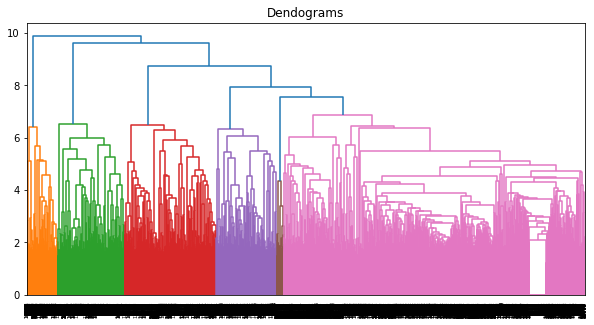

In [46]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10, 5))
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(df.iloc[:,3:], method='ward')) 

In [48]:
# cluster = 5
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
cluster.fit(df.iloc[:,3:])

AgglomerativeClustering(n_clusters=5)

In [49]:
print(cluster.labels_)  

[4 4 4 ... 0 0 0]


In [50]:
predict_hier = cluster.fit_predict(df.iloc[:,3:]) 

In [51]:
# So sánh predict và actual
df_predict_hier = pd.DataFrame({'Actual':df['class'],'Predict': pd.DataFrame(predict_hier)[0].values})
df_predict_hier.head()

,Actual,Predict
0,business,4
1,business,4
2,business,4
3,business,0
4,business,4


In [52]:
df_predict_hier.tail()

,Actual,Predict
12158,tech,0
12159,tech,1
12160,tech,0
12161,tech,0
12162,tech,0


In [53]:
df_predict_hier['Actual'].value_counts()

sport            2646
business         2579
politics         2536
tech             2402
entertainment    2000
Name: Actual, dtype: int64

In [54]:
df_predict_hier['Predict'].value_counts()

0    6708
1    1996
2    1447
4    1329
3     683
Name: Predict, dtype: int64

In [55]:
# Tỷ lệ các cluster thuộc về danh mục Business
bussiness_group = df_predict_hier.loc[df_predict_hier['Actual']=='business']
bussiness_group.value_counts()

Actual    Predict
business  0          1182
          4          1128
          2           136
          1           127
          3             6
dtype: int64

In [56]:
# Tỷ lệ các cluster thuộc về danh mục entertainment
entertaiment_group = df_predict_hier.loc[df_predict_hier['Actual']=='entertainment']
entertaiment_group.value_counts()

Actual         Predict
entertainment  0          1235
               3           587
               1            74
               2            59
               4            45
dtype: int64

In [57]:
# Tỷ lệ các cluster thuộc về danh mục politics
politics_group = df_predict_hier.loc[df_predict_hier['Actual']=='politics']
politics_group.value_counts()

Actual    Predict
politics  0          1227
          2          1165
          1            91
          4            49
          3             4
dtype: int64

In [58]:
# Tỷ lệ các cluster thuộc về danh mục sport
sport_group = df_predict_hier.loc[df_predict_hier['Actual']=='sport']
sport_group.value_counts()

Actual  Predict
sport   1          1512
        0          1023
        4            55
        3            29
        2            27
dtype: int64

In [59]:
# Tỷ lệ các cluster thuộc về danh mục tech
tech_group = df_predict_hier.loc[df_predict_hier['Actual']=='tech']
tech_group.value_counts()

Actual  Predict
tech    0          2041
        1           192
        2            60
        3            57
        4            52
dtype: int64

**Nhận xét:**
* Với Hierarchical model ta có thể dự đoán dữ liệu bản tin được chia thành 5 cluster theo sơ đồ "Dendograms"
* Tuy nhiên phần lớn các loại bản tin thuộc về cluster 0, 1. Không có sự phân biệt rõ ràng giữa các cụm được chia cho các loại bản tin
* Sử dụng thuật toán khác: GMM


### 3.3. GMM

In [107]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#df = df.drop(['Group'],axis=1)
df.iloc[:,3:] = sc.fit_transform(df.iloc[:,3:])
df.head()

,content,content_clean,class,TFIDF_abl,TFIDF_accept,TFIDF_access,TFIDF_accord,TFIDF_account,TFIDF_accus,TFIDF_achiev,...,TFIDF_worth,TFIDF_write,TFIDF_written,TFIDF_wrong,TFIDF_year,TFIDF_years,TFIDF_york,TFIDF_young,TFIDF_yuko,TFIDF_zealand
0,Ad sales boost Time Warner profit,ad sale boost time warner profit,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.083383,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678
1,Quarterly profits at US media giant TimeWarner...,quarterli profit us media giant timewarn jump ...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.083383,-0.077885,-0.077131,-0.090044,2.942677,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678
2,"The firm, which is now one of the biggest inve...",the firm one biggest investor google benefit...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.083383,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678
3,Time Warner said on Friday that it now owns 8%...,time warner said friday own search engin go...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.083383,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678
4,Time Warner's fourth quarter profits were slig...,time warner fourth quarter profit slightli be...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.083383,-0.077885,-0.077131,-0.090044,3.474814,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678


In [79]:
list_sil = []
K = range(4,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(df.iloc[:,3:])
    labels = gmm.predict(df.iloc[:,3:])
    sil = silhouette_score(df.iloc[:,3:], labels, metric='euclidean')
    list_sil.append(sil)
    
list_sil

[-0.01775115034176764,
 -0.0225047539546822,
 -0.008753454397957121,
 -0.0270642010127444]

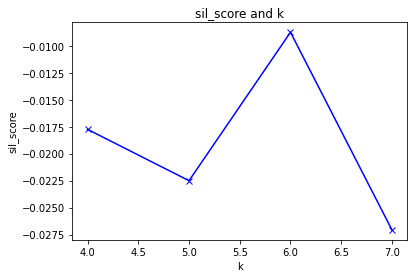

In [80]:
# Plot the elbow
plt.plot(K,list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('sil_score and k')
plt.show()

In [81]:
gmm = GaussianMixture(n_components=5)
gmm.fit(df.iloc[:,3:])

GaussianMixture(n_components=5)

In [82]:
print(gmm.weights_)

[0.12431144 0.41313821 0.21918934 0.15621146 0.08714955]


In [83]:
print(gmm.means_)

[[-0.06607502 -0.05375306 -0.10309124 ... -0.07771463 -0.07405785
  -0.06167767]
 [-0.04602311 -0.02821099 -0.09073585 ...  0.05525907 -0.07686432
   0.0816067 ]
 [ 0.00832346  0.09441917 -0.02136276 ...  0.00620554 -0.07686432
  -0.05221814]
 [ 0.19709926 -0.04639278  0.36725736 ... -0.05009721 -0.07686432
  -0.06167767]
 [-0.06179943  0.05609398 -0.02737197 ... -0.07691658  0.80111433
  -0.05699611]]


In [84]:
print(gmm.covariances_)

[[[ 3.84652936e-01  2.72616860e-02 -7.92902782e-04 ... -1.24673662e-03
   -1.70357526e-04  2.67490270e-33]
  [ 2.72616860e-02  3.59500339e-01  2.91252630e-02 ... -9.18358074e-04
   -1.25486978e-04  1.30331450e-33]
  [-7.92902782e-04  2.91252630e-02  9.29861471e-02 ... -2.68283247e-04
   -3.66589621e-05  1.90707825e-33]
  ...
  [-1.24673662e-03 -9.18358074e-04 -2.68283247e-04 ...  1.36509799e-01
   -5.76414554e-05 -1.69053851e-33]
  [-1.70357526e-04 -1.25486978e-04 -3.66589621e-05 ... -5.76414554e-05
    1.19020701e-02  4.17284821e-34]
  [ 2.67490270e-33  1.30331450e-33  1.90707825e-33 ... -1.69053851e-33
    4.17284821e-34  1.00000000e-06]]

 [[ 6.61473657e-01  1.21361929e-02  5.94197495e-03 ...  9.17948761e-03
    1.57355184e-33 -6.66320876e-03]
  [ 1.21361929e-02  8.51277815e-01 -1.78573183e-03 ... -1.07850937e-02
    5.15114397e-34 -1.00665147e-02]
  [ 5.94197495e-03 -1.78573183e-03  2.78505928e-01 ... -3.90193073e-03
    1.51713454e-33 -3.64195660e-03]
  ...
  [ 9.17948761e-03 -1.0

In [85]:
types = gmm.predict(df.iloc[:,3:])
types

array([1, 0, 0, ..., 1, 3, 1], dtype=int64)

In [86]:
# So sánh predict và actual
df_predict_gmm = pd.DataFrame({'Actual':df['class'],'Predict_gmm': types})
df_predict_gmm.head()

,Actual,Predict_gmm
0,business,1
1,business,0
2,business,0
3,business,3
4,business,0


In [90]:
df_predict_gmm['Predict_gmm'].value_counts()

1    5025
2    2666
3    1900
0    1512
4    1060
Name: Predict_gmm, dtype: int64

In [91]:
# Tỷ lệ các cluster thuộc về danh mục Business
bussiness_group = df_predict_gmm.loc[df_predict_gmm['Actual']=='business']
bussiness_group.value_counts()

Actual    Predict_gmm
business  0              986
          4              913
          1              399
          2              207
          3               74
dtype: int64

In [92]:
# Tỷ lệ các cluster thuộc về danh mục entertainment
entertaiment_group = df_predict_gmm.loc[df_predict_gmm['Actual']=='entertainment']
entertaiment_group.value_counts()

Actual         Predict_gmm
entertainment  1              1717
               2               109
               3                98
               0                42
               4                34
dtype: int64

In [93]:
# Tỷ lệ các cluster thuộc về danh mục politics
politics_group = df_predict_gmm.loc[df_predict_gmm['Actual']=='politics']
politics_group.value_counts()

Actual    Predict_gmm
politics  2              2126
          1               244
          0                82
          3                48
          4                36
dtype: int64

In [94]:
# Tỷ lệ các cluster thuộc về danh mục sport
sport_group = df_predict_gmm.loc[df_predict_gmm['Actual']=='sport']
sport_group.value_counts()

Actual  Predict_gmm
sport   1              2083
        0               344
        2               148
        4                44
        3                27
dtype: int64

In [95]:
# Tỷ lệ các cluster thuộc về danh mục tech
tech_group = df_predict_gmm.loc[df_predict_gmm['Actual']=='tech']
tech_group.value_counts()

Actual  Predict_gmm
tech    3              1653
        1               582
        2                76
        0                58
        4                33
dtype: int64

**Nhận xét:**
* GMM model cho kết quả phân nhóm là tương đối tốt
* Kết quả dự đoán cho các bản tin vào các Cluster: "Business": 0; "entertainment": 1, "politics": 2; "sport": 1; "tech": 3.

### Kết luận:
* Model được chọn là GMM model

## 4. Vẽ WordCloud của 4 nhóm chính của các bản tin

In [96]:
from wordcloud import WordCloud, STOPWORDS

In [97]:
df['Group'] = types
df.head()

,content,content_clean,class,TFIDF_abl,TFIDF_accept,TFIDF_access,TFIDF_accord,TFIDF_account,TFIDF_accus,TFIDF_achiev,...,TFIDF_write,TFIDF_written,TFIDF_wrong,TFIDF_year,TFIDF_years,TFIDF_york,TFIDF_young,TFIDF_yuko,TFIDF_zealand,Group
0,Ad sales boost Time Warner profit,ad sale boost time warner profit,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678,1
1,Quarterly profits at US media giant TimeWarner...,quarterli profit us media giant timewarn jump ...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.077885,-0.077131,-0.090044,2.942677,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678,0
2,"The firm, which is now one of the biggest inve...",the firm one biggest investor google benefit...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678,0
3,Time Warner said on Friday that it now owns 8%...,time warner said friday own search engin go...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.077885,-0.077131,-0.090044,-0.374399,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678,3
4,Time Warner's fourth quarter profits were slig...,time warner fourth quarter profit slightli be...,business,-0.126777,-0.098466,-0.116154,-0.156975,-0.110219,-0.107914,-0.086407,...,-0.077885,-0.077131,-0.090044,3.474814,-0.155428,-0.101514,-0.098253,-0.076864,-0.061678,0


### 4.1 WordCloud của "Business"

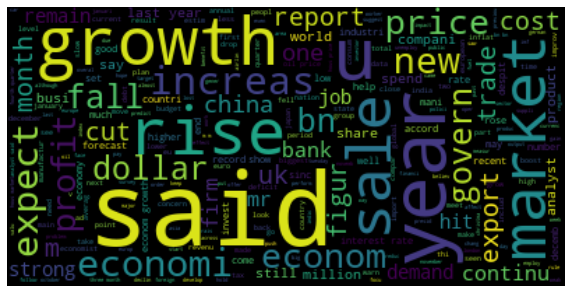

In [106]:
df_bussiness = df.loc[df['Group']==0,'content_clean']

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=500)

text = " ".join(df_bussiness.values)
wc.generate(text)
plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.2. WordCloud của "entertainment"

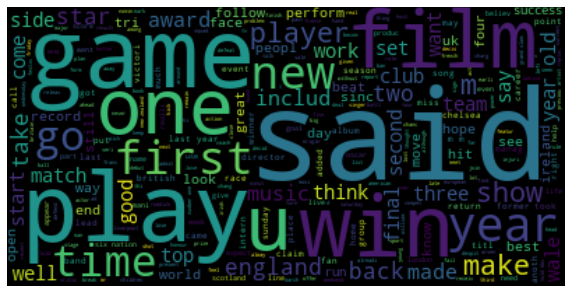

In [99]:
df_en_poli = df.loc[df['Group']==1,'content_clean']

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=500)

text = " ".join(df_en_poli.values)
wc.generate(text)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.3. WordCloud của "politics"

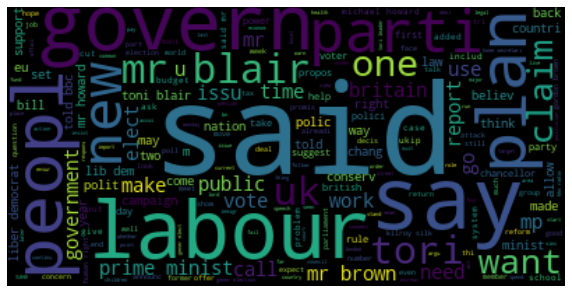

In [100]:
df_en_poli = df.loc[df['Group']==2,'content_clean']

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=500)

text = " ".join(df_en_poli.values)
wc.generate(text)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.4. WordCloud của "sport"

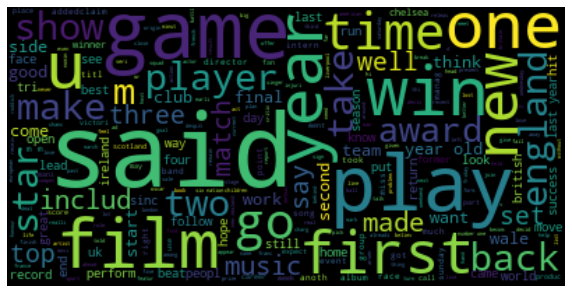

In [102]:
df_sport = df.loc[df['Group']==1,'content_clean']

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=500)

text = " ".join(df_sport.values)
wc.generate(text)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.5 WordCloud của "tech"

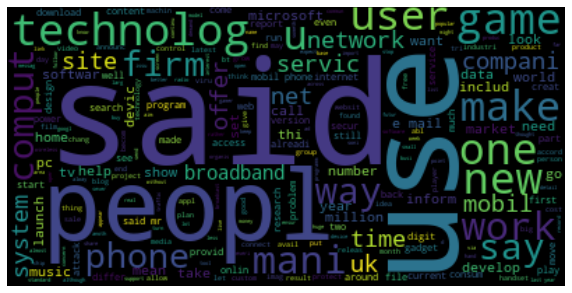

In [101]:

df_tech = df.loc[df['Group']==3,'content_clean']

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=500)

text = " ".join(df_tech.values)
wc.generate(text)

plt.figure(figsize=(10,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()